## Обробка та аналіз біомедичних даних
### БС-24
### Манзик Максим
## Лабораторна робота №6

### Дисперсійний аналіз

Для виконання роботи було обрано датасет, що містить інформацію, зібрану з онлайн-платформи про шахмати. Він охоплює різні атрибути, переможцем, оціненням, ходами тощо.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv(r"C:\Users\kepkp\PycharmProjects\Study\python_deepdive\tasks\Analytics\LB_6\games.csv")[:500]
print(df)

           id  rated    created_at  last_move_at  turns victory_status winner  \
0    TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1    l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2    mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3    kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4    9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   
..        ...    ...           ...           ...    ...            ...    ...   
495  lm8AKQIn   True  1.502730e+12  1.502730e+12    120           mate  black   
496  uiJ5thnm   True  1.502730e+12  1.502730e+12     41           mate  white   
497  GHlw6n8z   True  1.504210e+12  1.504220e+12     42         resign  black   
498  yLhzi5Dd   True  1.503470e+12  1.503470e+12     63         resign  white   
499  brPQOL4Y  False  1.503360e+12  1.503360e+12     23         resign  black   

    increment_code       wh

Будемо використовувати змінну, що характеризує оцінку, виграш, а в якості кількісної змінної буде змінна що показує дані про кількість кроків.

In [53]:
true = df.dropna(subset=['turns']).loc[df['rated'] == True, 'turns']
false = df.dropna(subset=['turns']).loc[df['rated'] == False, 'turns']

white = df.dropna(subset=['turns']).loc[df['winner'] == 'white', 'turns']
black = df.dropna(subset=['turns']).loc[df['winner'] == 'black', 'turns']

true_white = df.loc[(df['winner'] == 'white') & (df['rated'] == True), 'turns']
true_black = df.loc[(df['winner'] == 'black') & (df['rated'] == False), 'turns']
false_white = df.loc[(df['winner'] == 'white') & (df['rated'] == True), 'turns']
false_black = df.loc[(df['winner'] == 'black') & (df['rated'] == False), 'turns']

Перевіримо розподіли на нормальність. Використаємо тест Шапіро-Вілка. Сформулюємо гіпотези

Н0 - Вибірка "true" має нормальний розподіл
Н1 - Вибірка "true" має розподіл, відмінний від нормального

In [54]:
from scipy import stats

W_statistic, p_value = stats.shapiro(true)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9444950819015503
P-value: 2.918413427588362e-11


Отримали р-значення  за 0.05, отже вибірка розподілена не за нормальним законом.

Н0 - Вибірка "false" має нормальний розподіл
Н1 - Вибірка "false" має розподіл, відмінний від нормального 

In [55]:
W_statistic, p_value = stats.shapiro(false)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9400364756584167
P-value: 0.00042699306504800916


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "white" має нормальний розподіл
Н1 - Вибірка "white" має розподіл, відмінний від нормального 

In [56]:
W_statistic, p_value = stats.shapiro(white)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9472529888153076
P-value: 1.113982719402884e-07


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "black" має нормальний розподіл
Н1 - Вибірка "black" має розподіл, відмінний від нормального 

In [57]:
W_statistic, p_value = stats.shapiro(black)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9481273889541626
P-value: 2.663755935827794e-07


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "true_white" має нормальний розподіл
Н1 - Вибірка "true_white" має розподіл, відмінний від нормального 

In [58]:
W_statistic, p_value = stats.shapiro(true_white)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9480812549591064
P-value: 1.3079592235953896e-06


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "true_black" має нормальний розподіл
Н1 - Вибірка "true_black" має розподіл, відмінний від нормального 

In [59]:
W_statistic, p_value = stats.shapiro(true_black)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9400525093078613
P-value: 0.026094947010278702


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "false_white" має нормальний розподіл
Н1 - Вибірка "false_white" має розподіл, відмінний від нормального 

In [60]:
W_statistic, p_value = stats.shapiro(false_white)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9480812549591064
P-value: 1.3079592235953896e-06


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Н0 - Вибірка "false_black" має нормальний розподіл
Н1 - Вибірка "false_black" має розподіл, відмінний від нормального 

In [61]:
W_statistic, p_value = stats.shapiro(false_black)
print(f'Statistic: {W_statistic}')
print(f'P-value: {p_value}')

Statistic: 0.9400525093078613
P-value: 0.026094947010278702


Отримали р-значення менше за 0.05, отже відкидаємо нульову гіпотезу і робимо висновок, що дані розподілені за законом, відмінним від нормального.

Дамо коротку характеристику кожній з груп за кількісною змінною, розрахуємо кількість спостережень, середнє значення та стандартне відхилення.

In [62]:
data = [true, false, white, black, true_white, true_black, false_white, false_black]
data1 = ['true', 'false', 'white', 'black', 'true_white', 'true_black', 'false_white', 'false_black']

for elem, name in zip(data, data1):
    print(name)
    print("Кількість спостережень: ", elem.count())
    print("середнє значення: ", elem.mean())
    print("Стандартне відхилення: ", elem.std())
    print('\n')


true
Кількість спостережень:  410
середнє значення:  61.197560975609754
Стандартне відхилення:  34.41359960186376


false
Кількість спостережень:  90
середнє значення:  50.17777777777778
Стандартне відхилення:  32.239475341375226


white
Кількість спостережень:  242
середнє значення:  57.103305785123965
Стандартне відхилення:  32.296886362225216


black
Кількість спостережень:  229
середнє значення:  56.842794759825324
Стандартне відхилення:  31.681968182935446


true_white
Кількість спостережень:  199
середнє значення:  60.246231155778894
Стандартне відхилення:  32.92760153419593


true_black
Кількість спостережень:  43
середнє значення:  56.348837209302324
Стандартне відхилення:  34.689015498205954


false_white
Кількість спостережень:  199
середнє значення:  60.246231155778894
Стандартне відхилення:  32.92760153419593


false_black
Кількість спостережень:  43
середнє значення:  56.348837209302324
Стандартне відхилення:  34.689015498205954




Візуалізуємо дані з допомогою ящичкових діаграм

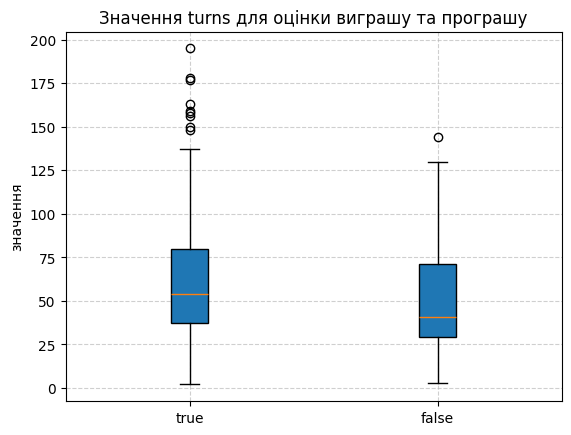

In [63]:
data_1 = [true, false]
fig, ax = plt.subplots()
ax.boxplot(data_1, patch_artist=True, labels=['true', 'false'])

ax.set_title('Значення turns для оцінки виграшу та програшу')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

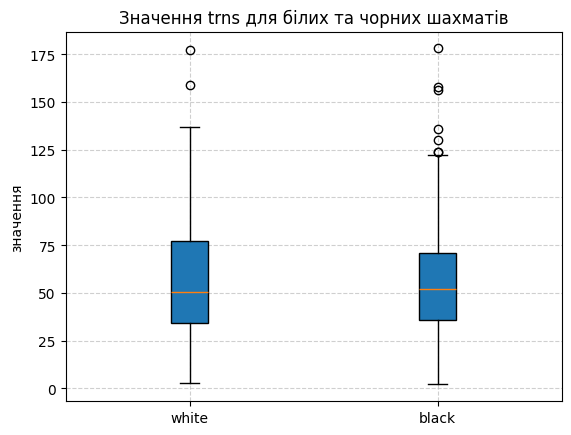

In [64]:
data_2 = [white, black]
fig, ax = plt.subplots()
ax.boxplot(data_2, patch_artist=True, labels=['white', 'black'])

ax.set_title('Значення trns для білих та чорних шахматів')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

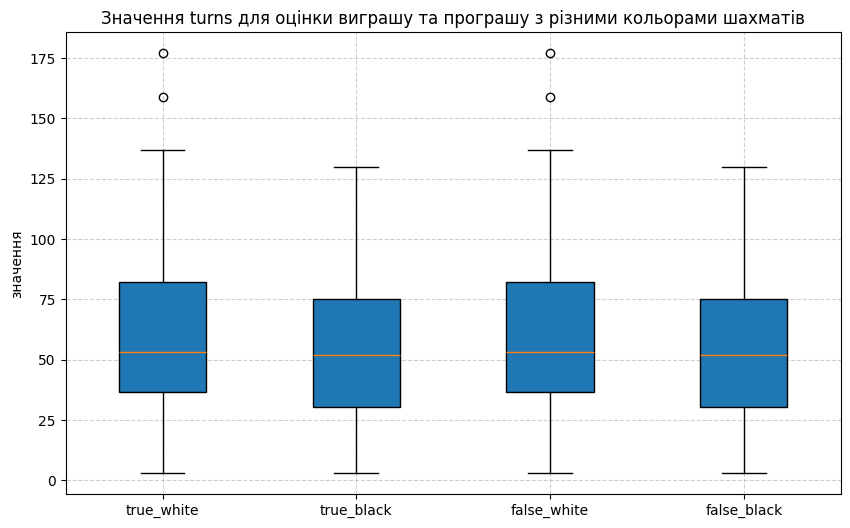

In [65]:
data_3 = [true_white, true_black, false_white, false_black]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_3, patch_artist=True, labels=['true_white', 'true_black', 'false_white', 'false_black'])

ax.set_title('Значення turns для оцінки виграшу та програшу з різними кольорами шахматів')
ax.set_ylabel('значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Дослідимо вплив оцінки виграшу (змінна "rated") на значення змінної "turns". Сформулюємо гіпотези:

Н0 - середні значення turns для true та false не відрізняються

Н1 - середні значення turns для true та false відрізняються

Проведемо однофакторний дисперсійний аналіз

In [66]:
from scipy.stats import f_oneway

f_value, p_value = f_oneway(true, false)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 7.736503061945018
p-значення 0.005616729855780643


Отримали р-значення менше за порогове (0.05), отже можемо прийняти першу гіпотезу і зробити висновок, що середні значення turns для true та false відрізняються, а отже оцінка виграшу має впливу на змінну turns.

Дослідимо вплив кольору шахматів на значення змінної turns. Сформулюємо гіпотези:

Н0 - середні значення turns для білих та чорних не відрізняються

Н1 - середні значення turns для білих та чорних відрізняються

Проведемо однофакторний дисперсійний аналіз.

In [67]:
f_value, p_value = f_oneway(white, black)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 0.007798261477204177
p-значення 0.9296697607394514


Отримали р-значення більше за порогове (0.05), отже можемо прийняти нуьову гіпотезу і зробити висновок, що середні значення turns для білих та чорних не відрізняються, а отже колір шахматів не має впливу на змінну turns.

Тепер порівняємо між собою групи оцінок виграшу з різними кольорами шахматів. Наприклад порівняємо середні значення turns для true_white та ture_black. Сформулюєно гіпотези:

Н0 - середні значення turns для true_white та true_black не відрізняються

Н1 - середні значення turns для true_white та true_black не відрізняються

Проведемо однофакторний дисперсійний аналіз

In [68]:
f_value, p_value = f_oneway(true_white, true_black)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 0.48603232002959923
p-значення 0.48637730958682046


Отримали р-значення менше за порогове (0.05), отже можемо прийняти першу гіпотезу і зробити висновок, що середні значення turns для true_white та true_black не відрізняються.

Аналогічний аналіз проведемо для false з різним кольором. Сформулюємо гіпотези:

Н0 - середні значення turns для false_white та false_black не відрізняється
Н1 - середні значення turns для false_white та false_black відрізняється

In [69]:
f_value, p_value = f_oneway(false_white, false_black)
print("F-значення", f_value)
print("p-значення", p_value)

F-значення 0.48603232002959923
p-значення 0.48637730958682046


Отримали р-значення менше за порогове (0.05), отже можемо прийняти першу гіпотезу і зробити висновок, що середні значення turns для false_white та false_black не відрізняються.

Оскільки, в ході аналізу було виявлено статистично значущі відмінності між середніми значеннями turns для кольору, то проведемо тест Тьюкі щоб з'ясувати між якими, конкретно, групами існують ці відмінності

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

data = np.concatenate([white, black])
groups = ['white'] * len(white) + ['black'] * len(black)

df1 = pd.DataFrame({'змінна': data, 'Діяльність': groups})

tukey_test = pairwise_tukeyhsd(endog=df1['змінна'], groups=df1['Діяльність'], alpha=0.05)
print(tukey_test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 black  white   0.2605 0.9297 -5.5364 6.0574  False
---------------------------------------------------


В результаті проведення тесту Тьюкі отримали значення, що свідчать про те, що між групами не існує статистично значущої різниці, що суперечить обчисленням, проведеним раніше. Це може бути пов'язано з тим, що дані розподілені не за нормальним законом,що не підходить для параметричних тестів, в тому числі і для дисперсійного аналізу.